## Age, Education, High-Income Population, Housing Costs

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import math

pd.set_option('max_row',50)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1,100))

In [2]:
#Read CSV files
g2010 = pd.read_csv('g2010.csv', index_col=0 )
g2019 = pd.read_csv('g2019.csv', index_col=0)

#Create Copies
g2010_df = g2010.copy()
g2019_df = g2019.copy()

In [3]:
g2010.head(3)

,ct2010,Census_Tract,boro_code,shape_area,shape_leng,geometry,Total_Population,Total_Male_Population,Total_Female_Population,Per_Population_25_to_34_yrs,...,Total_Houses_Built_2000_to_2004,GEO_ID_x,tot_occ_hous_units,med_hh_income,med_monthly_hous_cost,GEO_ID_y,tot_fams,tot_fams_1-10k,tot_fams_10-15k,tot_fams_15-25k
0,900,9.0,5,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,1880,909,971,10.6,...,44,1400000US36085000900,693,56192,1234,1400000US36085000900,1487,290,21,73
1,9800,98.0,1,1.906016e+06,5534.200306,POLYGON ((-73.96432543478758 40.75638153099091...,7045,2931,4114,30.9,...,0,1400000US36061009800,4253,101191,2078,1400000US36061009800,6772,390,161,404
2,10200,102.0,1,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...,189,81,108,7.9,...,0,1400000US36061010200,89,41809,1193,1400000US36061010200,189,27,23,85


In [4]:
g2019.head(3)

,ct2010,Census_Tract,boro_code,shape_area,shape_leng,geometry,Total_Population,Total_Male_Population,Total_Female_Population,Per_Population_25_to_34_yrs,...,Total_Houses_Built_2010_to_2013,GEO_ID_x,tot_occ_hous_units,med_hh_income,med_monthly_hous_cost,GEO_ID_y,tot_fams,tot_fams_1-10k,tot_fams_10-15k,tot_fams_15-25k
0,900,9.0,5,2.497010e+06,7729.016794,POLYGON ((-74.07920577013245 40.64343078374567...,1510,748,762,13.1,...,0,1400000US36085000900,616,50543,1506,1400000US36085000900,1248,216,76,106
1,9800,98.0,1,1.906016e+06,5534.200306,POLYGON ((-73.96432543478758 40.75638153099091...,7302,3638,3664,23.8,...,0,1400000US36061009800,4242,129167,2255,1400000US36061009800,6710,470,115,483
2,10200,102.0,1,1.860993e+06,5687.802439,POLYGON ((-73.97124277307127 40.76093641847906...,122,73,49,13.9,...,0,1400000US36061010200,66,-,1469,1400000US36061010200,102,20,0,22


In [5]:
mismatch_columns2019 = [ i for i in g2019 if i not in g2010 ]
mismatch_columns2010 = [ i for i in g2010 if i not in g2019 ]

In [6]:
#Mismatched Columns
print(mismatch_columns2010)
print(mismatch_columns2019)

['Total_Houses_Built_2005_to_2010', 'Total_Houses_Built_2000_to_2004']
['Total_Houses_Built_2014_to_2019', 'Total_Houses_Built_2010_to_2013']


The format of your polygon is WKT, so you have to convert it to shapely Polygon. Following Geopandas docs (https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html) do following

In [7]:
#Set Geometry for 2010 dataset
g2010['geometry'] = gpd.GeoSeries.from_wkt(g2010['geometry'])
gdf_2010 = gpd.GeoDataFrame(g2010,geometry="geometry")

#Set Geometry for 2019 dataset
g2019['geometry'] = gpd.GeoSeries.from_wkt(g2019['geometry'])
gdf_2019 = gpd.GeoDataFrame(g2019,geometry="geometry")

In [8]:
type(gdf_2010)

geopandas.geodataframe.GeoDataFrame

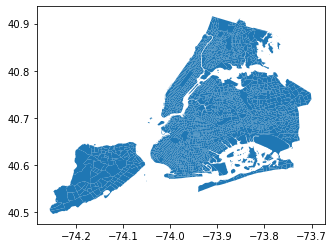

In [9]:
gdf_2010.plot();

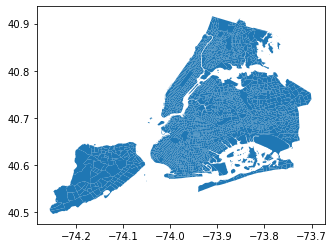

In [10]:
gdf_2019.plot();

# Column Preprocessing

### age: 2010

In [11]:
gdf_2010.columns

Index(['ct2010', 'Census_Tract', 'boro_code', 'shape_area', 'shape_leng',
       'geometry', 'Total_Population', 'Total_Male_Population',
       'Total_Female_Population', 'Per_Population_25_to_34_yrs',
       'Per_Population_35_to_44_yrs', 'Per_Population_45_to_54_yrs',
       'Median_Age', 'Total_Population_18_to_24_yrs',
       'Total_High_School_Graduates', 'Total_College_or_Associate_Degree',
       'Total_Bachelors_or_higher', 'Total_Population_25_yrs_or_over',
       'Total_Population_25_to_34_yrs', 'Total_House_Count',
       'Total_Houses_Built_2005_to_2010', 'Total_Houses_Built_2000_to_2004',
       'GEO_ID_x', 'tot_occ_hous_units', 'med_hh_income',
       'med_monthly_hous_cost', 'GEO_ID_y', 'tot_fams', 'tot_fams_1-10k',
       'tot_fams_10-15k', 'tot_fams_15-25k'],
      dtype='object')

In [12]:
gdf_2010.Per_Population_25_to_34_yrs # values are percentages

0       10.6
1       30.9
2        7.9
3       14.1
4       14.9
        ... 
2159    22.0
2160    29.2
2161    19.8
2162    34.8
2163    24.0
Name: Per_Population_25_to_34_yrs, Length: 2164, dtype: object

In [13]:
gdf_2010.Per_Population_35_to_44_yrs

0       13.8
1       16.9
2        9.5
3       18.3
4        9.2
        ... 
2159    16.5
2160    22.6
2161    24.9
2162    17.5
2163    13.9
Name: Per_Population_35_to_44_yrs, Length: 2164, dtype: object

In [14]:
gdf_2010.Per_Population_45_to_54_yrs

0       13.3
1       12.9
2       17.5
3        9.1
4       18.5
        ... 
2159    14.6
2160     8.9
2161    10.9
2162     4.6
2163    16.6
Name: Per_Population_45_to_54_yrs, Length: 2164, dtype: object

In [15]:
for col in ['Per_Population_25_to_34_yrs', 'Per_Population_35_to_44_yrs', 'Per_Population_45_to_54_yrs']:
    gdf_2010[col] = gdf_2010[col].replace('-',np.NaN)
    gdf_2010[col] = gdf_2010[col].astype('float')
    gdf_2010[col].fillna(gdf_2010[col].mean(),inplace=True)

In [16]:
gdf_2010['frac_pop_25-54_yrs'] = gdf_2010.Per_Population_25_to_34_yrs + gdf_2010.Per_Population_35_to_44_yrs + gdf_2010.Per_Population_45_to_54_yrs

In [17]:
gdf_2010['frac_pop_25-54_yrs'].value_counts()

44.666274    44
45.500000    20
41.000000    18
46.400000    18
42.000000    18
             ..
69.900000     1
52.000000     1
72.400000     1
53.900000     1
62.600000     1
Name: frac_pop_25-54_yrs, Length: 591, dtype: int64

In [18]:
gdf_2010['frac_pop_25-54_yrs'] = gdf_2010['frac_pop_25-54_yrs'].astype('float')

In [19]:
gdf_2010['frac_pop_25-54_yrs'].min()

0.0

In [20]:
gdf_2010['frac_pop_25-54_yrs'].max()

82.1

### age: 2019

In [21]:
for col in ['Per_Population_25_to_34_yrs', 'Per_Population_35_to_44_yrs', 'Per_Population_45_to_54_yrs']:
    gdf_2019[col] = gdf_2019[col].replace('-',np.NaN)
    gdf_2019[col] = gdf_2019[col].astype('float')
    gdf_2019[col].fillna(gdf_2019[col].mean(),inplace=True)

gdf_2019['frac_pop_25-54_yrs'] = gdf_2019.Per_Population_25_to_34_yrs + gdf_2019.Per_Population_35_to_44_yrs + gdf_2019.Per_Population_45_to_54_yrs

In [22]:
gdf_2019['frac_pop_25-54_yrs'].value_counts()

43.904663    41
39.700000    19
44.000000    19
41.700000    18
46.000000    17
             ..
44.400000     1
26.500000     1
34.800000     1
30.800000     1
68.300000     1
Name: frac_pop_25-54_yrs, Length: 626, dtype: int64

In [23]:
gdf_2019['frac_pop_25-54_yrs'] = gdf_2019['frac_pop_25-54_yrs'].astype('float')

In [24]:
gdf_2019['frac_pop_25-54_yrs'].min()

0.0

In [25]:
gdf_2019['frac_pop_25-54_yrs'].max()

100.0

### education: 2010

In [26]:
gdf_2010['Total_Bachelors_or_higher'].value_counts() # percent in tract

0.0     308
-        60
7.8      16
2.8      13
4.6      13
       ... 
48.0      1
75.9      1
33.8      1
53.2      1
80.7      1
Name: Total_Bachelors_or_higher, Length: 565, dtype: int64

In [27]:
gdf_2010['Total_Bachelors_or_higher'] = gdf_2010['Total_Bachelors_or_higher'].replace('-',np.NaN)

In [28]:
gdf_2010['Total_Bachelors_or_higher'].fillna(gdf_2010['Total_Bachelors_or_higher'].astype('float').mean(),inplace=True)

In [29]:
gdf_2010['Total_Bachelors_or_higher'].value_counts()

0.0                 308
18.3528041825095     60
7.8                  16
2.8                  13
4.6                  13
                   ... 
48.0                  1
75.9                  1
33.8                  1
53.2                  1
80.7                  1
Name: Total_Bachelors_or_higher, Length: 565, dtype: int64

In [30]:
gdf_2010['Total_Bachelors_or_higher'] = gdf_2010['Total_Bachelors_or_higher'].astype('float')

In [31]:
gdf_2010['Total_Bachelors_or_higher'].min()

0.0

In [32]:
gdf_2010['Total_Bachelors_or_higher'].max()

100.0

### education: 2019

In [33]:
gdf_2019['Total_Bachelors_or_higher'].value_counts() # percent in tract

0.000000    170
0.980392      3
2.325581      3
2.500000      3
1.605505      3
           ... 
9.570552      1
2.860646      1
0.692354      1
3.300689      1
2.239488      1
Name: Total_Bachelors_or_higher, Length: 1919, dtype: int64

In [34]:
gdf_2019['Total_Bachelors_or_higher'].sort_values()

0       0.0
847     0.0
802     0.0
790     0.0
783     0.0
       ... 
2049    NaN
2052    NaN
2054    NaN
2093    NaN
2157    NaN
Name: Total_Bachelors_or_higher, Length: 2164, dtype: float64

In [35]:
gdf_2019['Total_Bachelors_or_higher'] = gdf_2019['Total_Bachelors_or_higher'].replace('-',np.NaN)

In [36]:
gdf_2019['Total_Bachelors_or_higher'].fillna(gdf_2019['Total_Bachelors_or_higher'].astype('float').mean(),inplace=True)

In [37]:
gdf_2019['Total_Bachelors_or_higher'].value_counts()

0.000000    170
2.271621     41
1.605505      3
2.325581      3
2.500000      3
           ... 
9.570552      1
2.860646      1
0.692354      1
3.300689      1
2.239488      1
Name: Total_Bachelors_or_higher, Length: 1920, dtype: int64

In [38]:
gdf_2019['Total_Bachelors_or_higher'] = gdf_2019['Total_Bachelors_or_higher'].astype('float')

In [39]:
gdf_2019['Total_Bachelors_or_higher'].min()

0.0

In [40]:
gdf_2019['Total_Bachelors_or_higher'].max() # hmm seems low

40.7673860911271

### higher-income families: 2010

In [41]:
gdf_2010['tot_fams'].value_counts()

0       44
3341     6
2053     4
1455     4
2934     4
        ..
1721     1
3562     1
682      1
2429     1
2192     1
Name: tot_fams, Length: 1725, dtype: int64

In [42]:
# gdf_2010['tot_fams'] = gdf_2010['tot_fams'].replace(0,gdf_2010['tot_fams'].mean())

In [43]:
gdf_2010['tot_fams_1-25k'] = gdf_2010['tot_fams_1-10k']+gdf_2010['tot_fams_10-15k']+gdf_2010['tot_fams_15-25k']

In [44]:
gdf_2010['frac_tot_fams_1-25k'] = gdf_2010['tot_fams_1-25k']/gdf_2010['tot_fams']

In [45]:
#fix divide by 0 nulls
gdf_2010['frac_tot_fams_1-25k'].fillna(0,inplace=True)

In [46]:
gdf_2010['frac_tot_fams_1-25k'].value_counts()

0.000000    49
0.345865     2
0.333333     2
0.285714     2
0.390313     2
            ..
0.263437     1
0.301784     1
0.178040     1
0.190465     1
0.148723     1
Name: frac_tot_fams_1-25k, Length: 2111, dtype: int64

In [47]:
gdf_2010['frac_high_income']  = 1 - gdf_2010['frac_tot_fams_1-25k'] 

In [48]:
gdf_2010['frac_high_income'] = gdf_2010['frac_high_income']*100

In [49]:
gdf_2010['frac_high_income'].value_counts()

100.000000    49
65.413534      2
66.666667      2
71.428571      2
60.968661      2
              ..
73.656321      1
69.821567      1
82.195990      1
80.953516      1
85.127737      1
Name: frac_high_income, Length: 2111, dtype: int64

In [50]:
gdf_2010['frac_high_income'].sort_values()

2023      0.000000
1173      8.849558
2098     11.315547
1839     19.569120
1278     22.014260
           ...    
1178    100.000000
1984    100.000000
1978    100.000000
1406    100.000000
2021    100.000000
Name: frac_high_income, Length: 2164, dtype: float64

### higher-income: 2019

In [51]:
gdf_2019['tot_fams'].value_counts()

0        41
1791      4
3517      4
3904      4
2021      4
         ..
11199     1
1350      1
4387      1
2085      1
3988      1
Name: tot_fams, Length: 1752, dtype: int64

In [52]:
gdf_2019['tot_fams_1-25k'] = gdf_2019['tot_fams_1-10k']+gdf_2019['tot_fams_10-15k']+gdf_2019['tot_fams_15-25k']

In [53]:
gdf_2019['frac_tot_fams_1-25k'] = gdf_2019['tot_fams_1-25k']/gdf_2019['tot_fams']

In [54]:
#fix divide by 0 nulls
gdf_2019['frac_tot_fams_1-25k'].fillna(0,inplace=True)

In [55]:
gdf_2019['frac_tot_fams_1-25k'].value_counts()

0.000000    44
0.302521     2
0.217262     2
0.284404     2
0.223464     2
            ..
0.242379     1
0.119666     1
0.117400     1
0.335069     1
0.170455     1
Name: frac_tot_fams_1-25k, Length: 2112, dtype: int64

In [56]:
gdf_2019['frac_tot_fams_1-25k'].min()

0.0

In [57]:
gdf_2019['frac_tot_fams_1-25k'].max()

1.0

In [58]:
gdf_2019['frac_high_income'] = 1 - gdf_2019['frac_tot_fams_1-25k'] 

In [59]:
gdf_2019['frac_high_income'] = gdf_2019['frac_high_income']*100 # Scaling to 100

In [60]:
gdf_2019['frac_high_income'].value_counts()

100.000000    44
69.747899      2
78.273810      2
71.559633      2
77.653631      2
              ..
75.762082      1
88.033381      1
88.260010      1
66.493056      1
82.954545      1
Name: frac_high_income, Length: 2112, dtype: int64

### housing costs: 2010

In [61]:
# housing cost
gdf_2010['med_monthly_hous_cost'].value_counts()

-       53
1088     8
1141     8
1169     8
1147     8
        ..
1164     1
360      1
3483     1
1221     1
2188     1
Name: med_monthly_hous_cost, Length: 1134, dtype: int64

In [62]:
gdf_2010['med_monthly_hous_cost'] = gdf_2010['med_monthly_hous_cost'].replace('-',np.NaN)
gdf_2010['med_monthly_hous_cost'] = gdf_2010['med_monthly_hous_cost'].replace('4,000+',np.NaN)
gdf_2010['med_monthly_hous_cost'].fillna(gdf_2010['med_monthly_hous_cost'].astype('float').mean(),inplace=True)

In [63]:
gdf_2010['med_monthly_hous_cost'].value_counts()

1281.5898530109057    55
1141                   8
1147                   8
1169                   8
1088                   8
                      ..
1164                   1
360                    1
3483                   1
1221                   1
2188                   1
Name: med_monthly_hous_cost, Length: 1133, dtype: int64

In [64]:
gdf_2010['med_monthly_hous_cost'] = gdf_2010['med_monthly_hous_cost'].astype('float')

In [65]:
gdf_2010['med_monthly_hous_cost'].min()

234.0

In [66]:
gdf_2010['med_monthly_hous_cost'].max()

3483.0

In [67]:
# income
gdf_2010['med_hh_income'].value_counts()

-         54
36250      3
53125      3
49375      3
62083      3
          ..
84263      1
83000      1
100605     1
100110     1
144167     1
Name: med_hh_income, Length: 2027, dtype: int64

In [68]:
gdf_2010['med_hh_income'] = gdf_2010['med_hh_income'].replace('-',np.NaN)
gdf_2010['med_hh_income'] = gdf_2010['med_hh_income'].replace('250,000+',np.NaN)
gdf_2010['med_hh_income'].fillna(gdf_2010['med_hh_income'].astype('float').mean(),inplace=True)

In [69]:
gdf_2010['med_hh_income'].value_counts()

54747.307728781416    55
52500                  3
39375                  3
55625                  3
62083                  3
                      ..
84263                  1
83000                  1
100605                 1
100110                 1
144167                 1
Name: med_hh_income, Length: 2026, dtype: int64

In [70]:
gdf_2010['med_hh_income'] = gdf_2010['med_hh_income'].astype('float')

In [71]:
#combined to get percentage of monthly income going to monthly housing payments
gdf_2010['frac_mmhc'] = gdf_2010['med_monthly_hous_cost']/gdf_2010['med_hh_income'] * 100

In [72]:
gdf_2010.frac_mmhc.value_counts()

2.340918    55
3.214286     2
2.196042     1
2.800149     1
2.644176     1
            ..
1.686534     1
1.925361     1
2.215583     1
1.760546     1
1.517684     1
Name: frac_mmhc, Length: 2109, dtype: int64

In [73]:
gdf_2010.frac_mmhc.min()

0.9311827956989247

In [74]:
gdf_2010.frac_mmhc.max()

8.106666666666666

In [75]:
gdf_2010.frac_mmhc.sort_values()

1869    0.931183
5       0.986819
546     1.010265
2039    1.012097
866     1.057313
          ...   
1387    6.607582
958     6.650602
1257    7.372573
1207    7.969900
1981    8.106667
Name: frac_mmhc, Length: 2164, dtype: float64

### housing costs: 2019

In [76]:
gdf_2019['med_monthly_hous_cost'].value_counts()

-       61
1445     7
1367     7
1471     7
1547     6
        ..
690      1
2340     1
1096     1
2020     1
2551     1
Name: med_monthly_hous_cost, Length: 1186, dtype: int64

In [77]:
gdf_2019['med_monthly_hous_cost'] = gdf_2019['med_monthly_hous_cost'].replace('-',np.NaN)
gdf_2019['med_monthly_hous_cost'].fillna(gdf_2019['med_monthly_hous_cost'].astype('float').mean(),inplace=True)

In [78]:
gdf_2019['med_monthly_hous_cost'].value_counts()

1615.352353780314    61
1445                  7
1367                  7
1471                  7
1547                  6
                     ..
690                   1
2340                  1
1096                  1
2020                  1
2551                  1
Name: med_monthly_hous_cost, Length: 1186, dtype: int64

In [79]:
gdf_2019['med_monthly_hous_cost'] = gdf_2019['med_monthly_hous_cost'].astype('float')

In [80]:
gdf_2019['med_hh_income'].value_counts()

-           69
250,000+     5
81250        5
85000        4
81875        4
            ..
61005        1
64917        1
57574        1
123274       1
162857       1
Name: med_hh_income, Length: 1976, dtype: int64

In [81]:
gdf_2019['med_hh_income'] = gdf_2019['med_hh_income'].replace('-',np.NaN)
gdf_2019['med_hh_income'] = gdf_2019['med_hh_income'].replace('250,000+',np.NaN)
gdf_2019['med_hh_income'] = gdf_2019['med_hh_income'].astype('float')
gdf_2019['med_hh_income'].fillna(gdf_2019['med_hh_income'].mean(),inplace=True)

In [82]:
gdf_2019['med_hh_income'].min()

9740.0

In [83]:
gdf_2019['med_hh_income'].max()

228276.0

In [84]:
gdf_2019['frac_mmhc'] = gdf_2019['med_monthly_hous_cost']/gdf_2019['med_hh_income'] * 100

In [85]:
gdf_2019['frac_mmhc'] 

0       2.979641
1       1.745802
2       2.077845
3       2.040800
4       3.379392
          ...   
2159    1.884819
2160    1.470168
2161    1.835181
2162    1.930524
2163    1.566405
Name: frac_mmhc, Length: 2164, dtype: float64

In [86]:
gdf_2019.frac_mmhc.min()

0.8791887411837358

In [87]:
gdf_2019.frac_mmhc.max()

7.795678399633505

In [88]:
gdf_2019.frac_mmhc.sort_values()

1319    0.879189
280     0.897185
2032    0.904619
1068    0.957937
5       0.985459
          ...   
909     6.072648
1114    6.104679
1823    6.503167
1396    6.970994
1271    7.795678
Name: frac_mmhc, Length: 2164, dtype: float64

# Gentrification Scoring

### take a look at scaling

In [89]:
# age
gdf_2010['frac_pop_25-54_yrs'].min()

0.0

In [90]:
gdf_2010['frac_pop_25-54_yrs'].max()

82.1

In [91]:
gdf_2019['frac_pop_25-54_yrs'].min()

0.0

In [92]:
gdf_2019['frac_pop_25-54_yrs'].max()

100.0

In [93]:
# education
gdf_2010['Total_Bachelors_or_higher'].min()

0.0

In [94]:
gdf_2010['Total_Bachelors_or_higher'].max()

100.0

In [95]:
gdf_2019['Total_Bachelors_or_higher'].min()

0.0

In [96]:
gdf_2019['Total_Bachelors_or_higher'].max()

40.7673860911271

In [97]:
# high-income population
gdf_2010['frac_high_income'].min()

0.0

In [98]:
gdf_2010['frac_high_income'].max()

100.0

In [99]:
gdf_2019['frac_high_income'].min()

0.0

In [100]:
gdf_2019['frac_high_income'].max()

100.0

In [101]:
# housing costs
gdf_2010['frac_mmhc'].min()

0.9311827956989247

In [102]:
gdf_2010['frac_mmhc'].max()

8.106666666666666

In [103]:
gdf_2019['frac_mmhc'].min()

0.8791887411837358

In [104]:
gdf_2019['frac_mmhc'].max()

7.795678399633505

## Gentrification Index: 2010

In [179]:
# standardize everything 1-100
gdf_2010['bach_higher'] = scaler.fit_transform(gdf_2010[['Total_Bachelors_or_higher']])
gdf_2010['high_inc'] = scaler.fit_transform(gdf_2010[['frac_high_income']])
gdf_2010['mmhc'] = scaler.fit_transform(gdf_2010[['frac_mmhc']])
gdf_2010['age_25_54'] = scaler.fit_transform(gdf_2010[['frac_pop_25-54_yrs']])

In [180]:
#INDICES
gdf_2010['indices'] = \
gdf_2010['bach_higher']*\
gdf_2010['high_inc']*\
gdf_2010['mmhc']*\
gdf_2010['age_25_54']

In [181]:
gdf_2010['indices'].min()

392.0134952566573

In [182]:
gdf_2010['indices'].max()

19339185.10465584

In [183]:
gdf_2010['indices'].sort_values(ascending=False)

1882    1.933919e+07
1177    1.931239e+07
1821    1.799452e+07
1505    1.568099e+07
739     1.364348e+07
            ...     
2008    1.821428e+04
280     1.719844e+04
1173    9.285355e+03
1117    8.810910e+02
2023    3.920135e+02
Name: indices, Length: 2164, dtype: float64

In [184]:
# scale index 1-100
gdf_2010['indices'] = scaler.fit_transform(gdf_2010[['indices']])

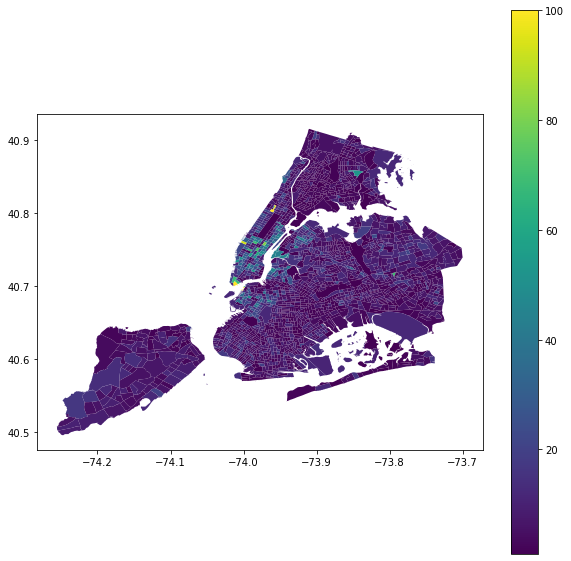

In [185]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_2010.plot(column='indices', ax=ax,legend=True);

In [186]:
county_pop_avg_list_2010 = []
for i in range(1,6):
    county_pop_avg_list_2010.append(gdf_2010[gdf_2010['boro_code'] == i]['Total_Population'].mean())

In [187]:
county_pop_thresh = []
for i in range(5):
    county_pop_thresh.append(math.ceil(county_pop_avg_list_2010[i])*0.05) #take 5% as threshold for each county

In [188]:
county_pop_thresh

[274.90000000000003, 200.35000000000002, 162.3, 164.65, 210.70000000000002]

In [189]:
M_tract = gdf_2010[gdf_2010['boro_code'].astype(int) == 1]
Bx_tract = gdf_2010[gdf_2010['boro_code'].astype(int) == 2]
B_tract = gdf_2010[gdf_2010['boro_code'].astype(int) == 3]
Q_tract = gdf_2010[gdf_2010['boro_code'].astype(int) == 4]
S_tract = gdf_2010[gdf_2010['boro_code'].astype(int) == 5]

In [190]:
ingore_tracts_M = (M_tract[M_tract['Total_Population'].astype(int) < county_pop_thresh[0]]['Census_Tract']).index
ingore_tracts_Bx = (Bx_tract[Bx_tract['Total_Population'].astype(int) < county_pop_thresh[1]]['Census_Tract']).index
ingore_tracts_B = (B_tract[B_tract['Total_Population'].astype(int) < county_pop_thresh[2]]['Census_Tract']).index
ingore_tracts_Q = (Q_tract[Q_tract['Total_Population'].astype(int) < county_pop_thresh[3]]['Census_Tract']).index
ingore_tracts_S = (S_tract[S_tract['Total_Population'].astype(int) < county_pop_thresh[4]]['Census_Tract']).index

ingore_tracts_M = np.asarray(ingore_tracts_M)
ingore_tracts_Bx = np.asarray(ingore_tracts_Bx)
ingore_tracts_B = np.asarray(ingore_tracts_B)
ingore_tracts_Q = np.asarray(ingore_tracts_Q)
ingore_tracts_S = np.asarray(ingore_tracts_S)

In [191]:
Ignore_tracts_index = np.concatenate((ingore_tracts_M,ingore_tracts_Bx,ingore_tracts_B,ingore_tracts_Q,ingore_tracts_S))

In [192]:
Ignore_tracts_index

array([   2,    4,  596, 1018, 1019, 1021, 1022, 1178, 1485, 1515, 1649,
       1824, 2093, 2149, 1173, 1211, 1372, 1406, 2051, 2052, 2117,  475,
        674,  986,  993, 1459, 1654, 1658, 1840, 1968, 2015, 2021, 2054,
       2157,  501,  678,  752,  792,  853,  981, 1036, 1063, 1071, 1134,
       1414, 1562, 1604, 1650, 1808, 1875, 1891, 1903, 1946, 1984, 2005,
       2018, 2023, 2029, 2049, 2155, 1999, 2038])

In [193]:
#setting gen score = 0 for above tracts
for i in range(len(Ignore_tracts_index)):
    gdf_2010['indices'].loc[Ignore_tracts_index[i]] = 0

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


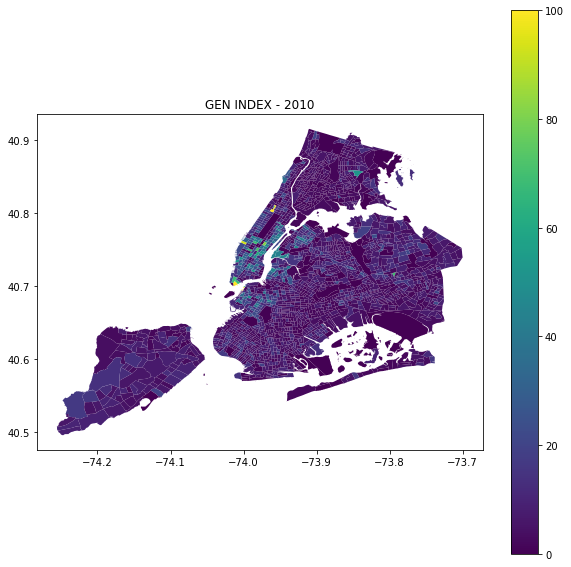

In [194]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_2010.plot(column='indices',legend=True,ax=ax)
plt.title('GEN INDEX - 2010')
#ax.set_facecolor('#22262d')
plt.show()

## Gentrification index: 2019

In [195]:
# standardize everything
gdf_2019['bach_higher'] = scaler.fit_transform(gdf_2019[['Total_Bachelors_or_higher']])
gdf_2019['high_inc'] = scaler.fit_transform(gdf_2019[['frac_high_income']])
gdf_2019['mmhc'] = scaler.fit_transform(gdf_2019[['frac_mmhc']])
gdf_2019['age_25_54'] = scaler.fit_transform(gdf_2019[['frac_pop_25-54_yrs']])

In [196]:
# INDICES
gdf_2019['indices'] = \
gdf_2019['bach_higher']*\
gdf_2019['high_inc']*\
gdf_2019['mmhc']*\
gdf_2019['age_25_54']

In [197]:
gdf_2019['indices'].min()

1254.212829110544

In [198]:
gdf_2019['indices'].max()

6881931.422524572

In [199]:
gdf_2019['indices'] = scaler.fit_transform(gdf_2019[['indices']])

In [200]:
gdf_2019['indices'].min()

1.0

In [201]:
gdf_2019['indices'].max()

100.00000000000001

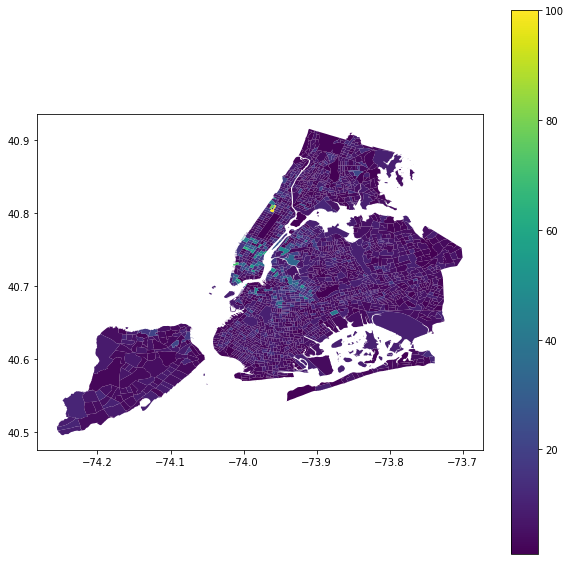

In [202]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_2019.plot(column='indices',ax=ax,legend=True);

In [203]:
county_pop_avg_list_2019 = []
for i in range(1,6):
    county_pop_avg_list_2019.append(gdf_2019[gdf_2019['boro_code'] == i]['Total_Population'].mean())

In [204]:
county_pop_thresh = []
for i in range(5):
    county_pop_thresh.append(math.ceil(county_pop_avg_list_2019[i])*0.05) #take 5% as threshold for each county

In [205]:
county_pop_thresh

[283.35, 211.3, 170.4, 171.25, 215.9]

In [206]:
M_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 1]
Bx_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 2]
B_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 3]
Q_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 4]
S_tract = gdf_2019[gdf_2019['boro_code'].astype(int) == 5]

In [207]:
ingore_tracts_M = (M_tract[M_tract['Total_Population'].astype(int) < county_pop_thresh[0]]['Census_Tract']).index
ingore_tracts_Bx = (Bx_tract[Bx_tract['Total_Population'].astype(int) < county_pop_thresh[1]]['Census_Tract']).index
ingore_tracts_B = (B_tract[B_tract['Total_Population'].astype(int) < county_pop_thresh[2]]['Census_Tract']).index
ingore_tracts_Q = (Q_tract[Q_tract['Total_Population'].astype(int) < county_pop_thresh[3]]['Census_Tract']).index
ingore_tracts_S = (S_tract[S_tract['Total_Population'].astype(int) < county_pop_thresh[4]]['Census_Tract']).index

ingore_tracts_M = np.asarray(ingore_tracts_M)
ingore_tracts_Bx = np.asarray(ingore_tracts_Bx)
ingore_tracts_B = np.asarray(ingore_tracts_B)
ingore_tracts_Q = np.asarray(ingore_tracts_Q)
ingore_tracts_S = np.asarray(ingore_tracts_S)

In [208]:
Ignore_tracts_index = np.concatenate((ingore_tracts_M,ingore_tracts_Bx,ingore_tracts_B,ingore_tracts_Q,ingore_tracts_S))

In [209]:
Ignore_tracts_index

array([   2,    4,  596, 1018, 1019, 1022, 1178, 1485, 1515, 1649, 1824,
       2093, 2149, 1173, 1211, 1372, 1401, 1406, 2047, 2051, 2052,  475,
        674,  986,  993, 1459, 1658, 1840, 2015, 2021, 2054, 2157,  501,
        678,  752,  792,  853,  981, 1036, 1063, 1071, 1134, 1414, 1562,
       1604, 1650, 1808, 1875, 1891, 1903, 1946, 1978, 1984, 2005, 2018,
       2023, 2029, 2049, 2155, 1999, 2038, 2136])

In [210]:
#setting gen score = 0 for above tracts
for i in range(len(Ignore_tracts_index)):
    gdf_2019['indices'].loc[Ignore_tracts_index[i]] = 0

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


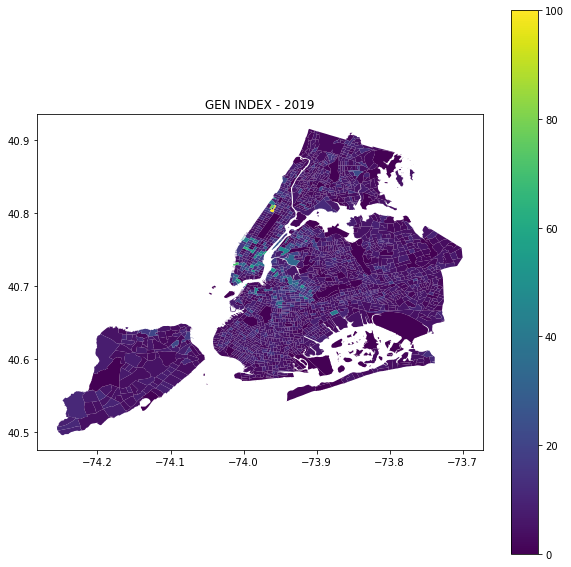

In [211]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_2019.plot(column='indices',legend=True,ax=ax)
plt.title('GEN INDEX - 2019')
plt.show()

# Gentrification Scoring

In [212]:
gdf_2010['indices']

0        6.143124
1       46.977162
2        0.000000
3       36.592593
4        0.000000
          ...    
2159    38.838194
2160    33.942882
2161    13.370482
2162    10.673390
2163    18.015136
Name: indices, Length: 2164, dtype: float64

In [213]:
gdf_2019.indices

0        2.359965
1       10.457613
2        0.000000
3       11.018687
4        0.000000
          ...    
2159     6.814219
2160     3.876802
2161     4.782879
2162     7.606065
2163     4.510294
Name: indices, Length: 2164, dtype: float64

In [214]:
gen_score = gdf_2019.indices - gdf_2010['indices']

In [215]:
gen_score

0       -3.783159
1      -36.519549
2        0.000000
3      -25.573906
4        0.000000
          ...    
2159   -32.023975
2160   -30.066080
2161    -8.587603
2162    -3.067325
2163   -13.504842
Name: indices, Length: 2164, dtype: float64

In [216]:
gen_score.min()

-84.51274370672401

In [217]:
gen_score.max()

71.66573537598687

In [218]:
gdf_2010['gen_score'] = gen_score

In [220]:
# look only at gentrifying tracts, not de-gentrifying?
gdf_2010['gen_score'][gdf_2010['gen_score']<0] = 0

<ipython-input-220-55f0b2d91c85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_2010['gen_score'][gdf_2010['gen_score']<0] = 0


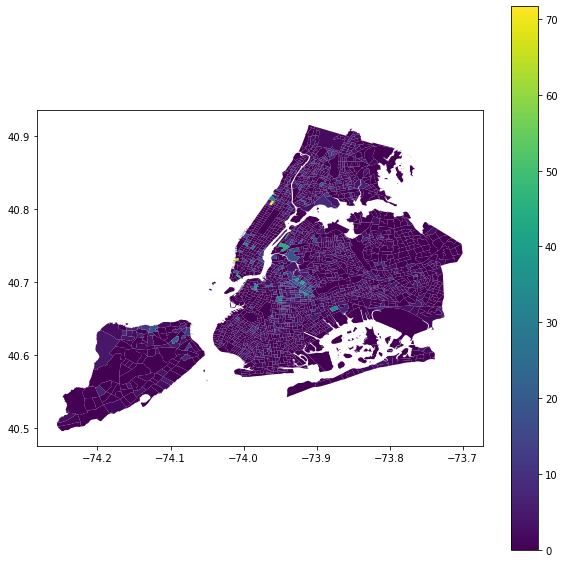

In [221]:
fig,ax = plt.subplots(figsize=(10,10))
gdf_2010.plot(column='gen_score', ax=ax,legend=True);

## cross-correlation of index features

In [238]:
# 2010
gdf_2010[['Total_Bachelors_or_higher', 'frac_high_income', 'frac_pop_25-54_yrs', 'mmhc', 'indices']].corr()

,Total_Bachelors_or_higher,frac_high_income,frac_pop_25-54_yrs,mmhc,indices
Total_Bachelors_or_higher,1.000000,0.431695,0.399642,-0.333373,0.844077
frac_high_income,0.431695,1.000000,0.300870,-0.498860,0.317213
frac_pop_25-54_yrs,0.399642,0.300870,1.000000,-0.177164,0.532597
mmhc,-0.333373,-0.498860,-0.177164,1.000000,-0.082315
indices,0.844077,0.317213,0.532597,-0.082315,1.000000


In [239]:
# 2019
gdf_2019[['Total_Bachelors_or_higher', 'frac_high_income', 'frac_pop_25-54_yrs', 'mmhc', 'indices']].corr()

,Total_Bachelors_or_higher,frac_high_income,frac_pop_25-54_yrs,mmhc,indices
Total_Bachelors_or_higher,1.000000,0.212552,0.181794,-0.088101,0.807388
frac_high_income,0.212552,1.000000,0.311088,-0.541257,0.121754
frac_pop_25-54_yrs,0.181794,0.311088,1.000000,-0.109593,0.347684
mmhc,-0.088101,-0.541257,-0.109593,1.000000,0.188874
indices,0.807388,0.121754,0.347684,0.188874,1.000000
